In [ ]:
#크롤링을 통해 추출한 데이터가 본 ipynb 파일과 같은 디렉토리에 있어야함

# install requirements

In [6]:
!pip install konlpy

In [8]:
!pip install wordcloud

# load data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

In [19]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'NanumGothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [20]:
df_1 = pd.read_csv("./crawler/files/1st.csv")
df_2 = pd.read_csv("./crawler/files/2nd.csv")
df_3 = pd.read_csv("./crawler/files/3rd.csv")

In [21]:
df_1.head()

,Unnamed: 0,Unnamed: 0.1,title,publish,news_text
0,0,0,코로나19 확진 374명 추가·총 5천186명…43일만에 5천명 넘어,2020.03.03.,3일 0시 기준 대구·경북 총 4천286명·신천지 관련 총 2천698명오늘도 분주한...
1,1,1,"코로나19로 일자리 없는 제주 中불법체류자들 ""차라리 귀국""(종합)",2020.03.03.,"법무부 자진출국 유도 지난달 230명 이상 출국신고, 3일 250여명 몰려…역대 최..."
2,2,2,코로나19 무서워…꼭꼭 숨었던 불법체류자 '탈'제주,2020.03.03.,코로나19 국내 확산세로 불법체류 중국인 자진출국 잇따라[제주CBS 고상현 기자]코...
3,3,3,"""나 돌아갈래"" 코로나19로 제주 中불법체류자 수백명 탈출 행렬",2020.03.03.,"법무부 자진출국 유도 지난달 230명 이상 출국신고, 3일 하루 200여명 몰려 코..."
4,4,4,코로나19 대구 진단검사 우선순위 변경 '신천지신도→일반시민'(종합),2020.03.03.,"정부 ""대구서 지역사회 감염 일정 수준 이상 진행됐다고 평가""""신천지 신도 여부 떠..."


In [13]:
df_2.head()

,Unnamed: 0,title,publish,news_text
0,0,"中양제츠 서울 아닌 부산에 온다…""코로나 때문 아냐""",2020.08.19.,[머니투데이 정진우 기자] [[the300]] [서울=뉴시스]박영태 기자 = 강민...
1,1,"정은경의 경고 ""코로나 확산 무서운 속도, 의료붕괴 올수도""",2020.08.17.,정은경 중앙방역대책본부장은 17일 코로나바이러스 감염증 확진자가 전국으로 확산하고 ...
2,2,전광훈 목사도 코로나19 확진…서울의료원 이송(종합3보),2020.08.17.,"일반병원서 검사…방역당국 ""광복절 집회 접촉자 검사해야""전광훈 목사, 보건소 차량으..."
3,3,"빌게이츠 ""코로나로 수백만명 더 사망, 2021년 말 종식""",2020.08.19.,마이크로소프트(MS) 창업자인 빌 게이츠 ‘빌&멀린다 게이츠 재단’ 회장은 코로나 ...
4,4,전광훈 목사도 코로나19 확진…서울의료원 이송(종합3보),2020.08.17.,"일반병원서 검사…방역당국 ""광복절 집회 접촉자 검사해야""전광훈 목사, 보건소 차량으..."


In [14]:
df_3.head()

,Unnamed: 0,title,publish,news_text
0,0,"윤석열, 검찰청에 코로나 특별지시 ""소상공인 소환조사 자제""",2020.12.16.,지난 10일 저녁 서울 서초구 서울성모병원 장례식장에서 지인의 조뮨을 마친 뒤 장례...
1,1,해외여행이 그리워… 국민 70% “코로나 백신 맞겠다”,2020.12.15.,53% “백신 보급돼도 해외 안 가”미국 식품의약국(FDA) 전문가 패널이 안전하고...
2,2,"윤희석 국민의힘 대변인 코로나19 확진…정부, 중환자 병상 확보 총력 [종합]",2020.12.19.,사진=연합뉴스윤희석 국민의힘 대변인이 19일 신종 코로나바이러스 감염증(코로나19)...
3,3,"유럽의약품청 ""화이자 코로나19 백신 회의 21일로 앞당겨""(종합)",2020.12.15.,미국 제약사 화이자 로고 [로이터=연합뉴스 자료사진](브뤼셀=연합뉴스) 김정은 특파...
4,4,"""가족 기침 증상""…이재명, 코로나 검사받고 자가격리",2020.12.18.,이재명 경기도지사의 가족 중 한 명이 기침 증상을 보여 이 지사가 18일 코로나19...


## 함수 정의

*   to_content(): dataframe에서 뉴스 본문이 있는 칼럼만 추출


*   extraction(): 형태소 분석기 okt를 통해 명사만 뽑아, Counter로 빈도순 나열 및 키워드 추출


*   to_dataframe(): 각 뉴스별로 추출한 키워드로 새로운 dataframe 만들기 ( 다른 칼럼은 publish(날짜), title )


*   frequency(): 각 뉴스별 keyword를 모아 또 빈도수 count -> top 5를 골라 해당 대유행 시기의 keyword로 


*   show_wordcloud(): wordcloud를 통해 시각화

----------------------------

extraction 함수의 Keyword 추출 알고리즘:
1. 명사를 뽑아
2. 길이가 1보다 크고 "코로나"가 아닌 단어만 sort
3. 빈도수가 높은 순서대로 10개를 뽑고 제목과 비교
4. 제목이 해당 기사를 압축적으로 잘 표현한다 생각해서, 순서대로 제목 안에 포함되어 있으면 해당 단어를 Keyword로 추출
5. 만약 10개 모두 제목에 포함되어 있지 않으면 최빈도 단어(top1)을 Keyword로

In [16]:
def to_content(data):
    return data['news_text']

In [22]:
def extraction(text, news_df):
    represent = []
    okt = Okt()
    
    for idx, news in enumerate(text):
        noun = okt.nouns(news)
        count = Counter(noun)
        #value값들 중에 길이가 1개 이하거나 == "코로나"면 제외(이미 코로나와 관련있는 기사를 뽑았으므로)
        count = Counter({x : count[x] for x in count if len(x) > 1 and x != "코로나"})
        #기사 안에서 최빈도 단어 10개 추출
        noun_list = count.most_common(10) 
        #print(noun_list)

        for k in range(len(noun_list)):
            if noun_list[k][0] in news_df['title'][idx]:
                represent.append(noun_list[k][0])
                #print(news_df['Title'][idx])
                #print("제목에 포함: {}".format(noun_list[k][0]))
                break
        if len(represent) != idx+1:
            represent.append(noun_list[0][0])
            #print(news_df['Title'][idx])
            #print("제목에 미포함: {}".format(noun_list[0][0]))

     #Okt가 '확진자'를 '진자'로 잘못 추출하는 것을 발견 -> 불용어로 처리해 원 단어로 대체
    for i, v in enumerate(represent):
        if v == "진자":
            represent[i] = "확진자"
    return represent

In [23]:
def to_dataframe(data, represent):
    keyword_df = pd.DataFrame()
    keyword_df['title'] = data['title']
    keyword_df['publish'] = data['publish']

    column_values = pd.Series(represent)
    keyword_df.insert(loc=2, column='Keyword', value=column_values)
    return keyword_df

In [24]:
def frequency(represent):
    count = Counter(represent)
    return count.most_common(5) #시기를 대표하는 최빈도 단어 5개

In [28]:
def show_wordcloud(represent):
    count = Counter(represent)
    font_path = 'NanumGothic.ttf'
    cloud = WordCloud(font_path=font_path, width=800, height=600).generate_from_frequencies(count)
    plt.figure(figsize=(12, 8))
    plt.imshow(cloud)
    plt.axis('off')

# keyword extraction 및 visualization

In [29]:
news_1 = to_content(df_1)
represent_1 = extraction(news_1, df_1)
keyword_df_1 = to_dataframe(df_1, represent_1)
most_freq_1 = frequency(represent_1)

In [30]:
print(represent_1[:20])

['확진자', '제주', '불법체류', '제주', '검사', '등기', '금지', '구미', '이재용', '부회장', '물가', '물가', '물가', '물가', '확진자', '제주', '불법체류', '제주', '검사', '등기']


In [31]:
keyword_df_1

,title,publish,Keyword
0,코로나19 확진 374명 추가·총 5천186명…43일만에 5천명 넘어,2020.03.03.,확진자
1,"코로나19로 일자리 없는 제주 中불법체류자들 ""차라리 귀국""(종합)",2020.03.03.,제주
2,코로나19 무서워…꼭꼭 숨었던 불법체류자 '탈'제주,2020.03.03.,불법체류
3,"""나 돌아갈래"" 코로나19로 제주 中불법체류자 수백명 탈출 행렬",2020.03.03.,제주
4,코로나19 대구 진단검사 우선순위 변경 '신천지신도→일반시민'(종합),2020.03.03.,검사
...,...,...,...
11776,우한 코로나 항체 탐지용 단백질 제작 성공…치료제 개발 본격화,2020.03.10.,치료
11777,"시진핑, 코로나19 발병 3개월 만에 발원지 우한 뒤늦게 방문",2020.03.10.,우한
11778,"시진핑이 우한에…""코로나19 종식선언 시그널""",2020.03.10.,우한
11779,[단독]대구 통합당 후보 선대본부장 코로나로 사망(종합),2020.03.10.,후보


In [32]:
print(most_freq_1)

[('확진자', 891), ('친서', 891), ('대구', 594), ('대통령', 594), ('확진', 495)]


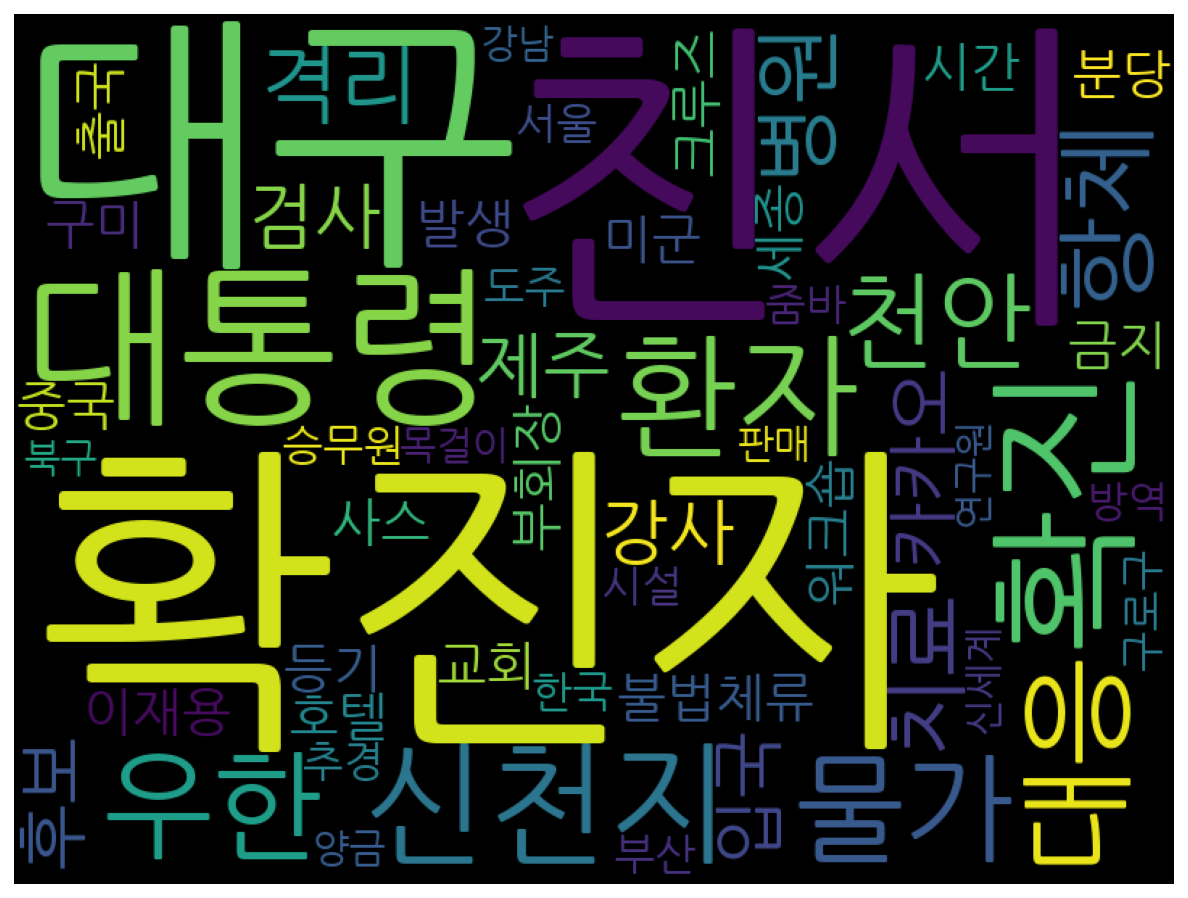

In [33]:
show_wordcloud(represent_1)

In [34]:
news_2 = to_content(df_2)
represent_2 = extraction(news_2, df_2)
keyword_df_2 = to_dataframe(df_2, represent_2)
most_freq_2 = frequency(represent_2)

In [35]:
keyword_df_2

,title,publish,Keyword
0,"中양제츠 서울 아닌 부산에 온다…""코로나 때문 아냐""",2020.08.19.,부산
1,"정은경의 경고 ""코로나 확산 무서운 속도, 의료붕괴 올수도""",2020.08.17.,확산
2,전광훈 목사도 코로나19 확진…서울의료원 이송(종합3보),2020.08.17.,목사
3,"빌게이츠 ""코로나로 수백만명 더 사망, 2021년 말 종식""",2020.08.19.,게이츠
4,전광훈 목사도 코로나19 확진…서울의료원 이송(종합3보),2020.08.17.,목사
...,...,...,...
27964,'코로나 충격' 2분기 성장률 -3.2%…금융위기 이후 최저(종합),2020.09.01.,성장
27965,코로나19 신규확진 235명…누적확진 2만명 돌파,2020.09.01.,확진자
27966,[속보]코로나19 신규 확진자 235명···누적 확진자 2만명 돌파,2020.09.01.,확진자
27967,신규 확진자 235명…‘코로나 사태’ 225일 만에 누적 2만 명,2020.09.01.,누적


In [36]:
print(most_freq_2)

[('확진자', 1194), ('백신', 1088), ('확진', 901), ('목사', 888), ('방한', 783)]


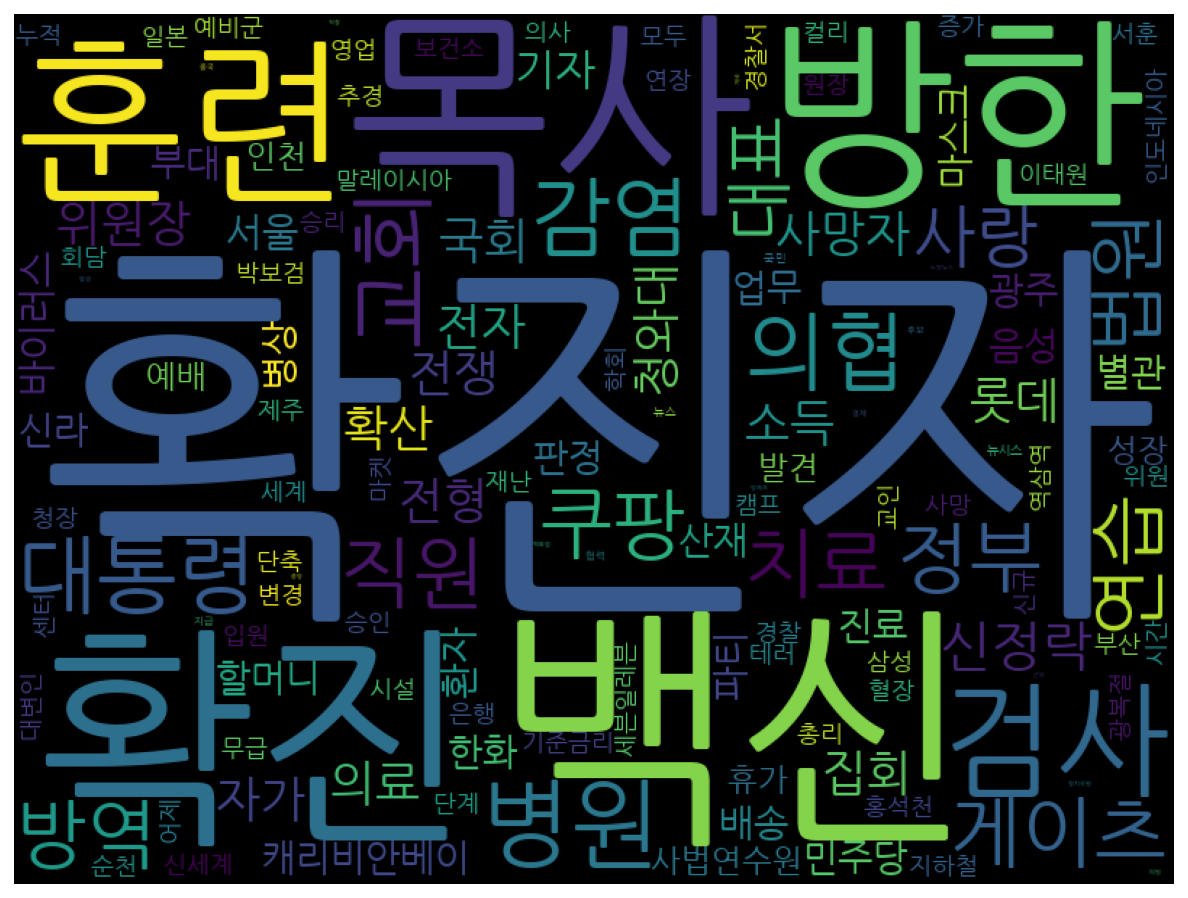

In [37]:
show_wordcloud(represent_2)

In [38]:
news_3 = to_content(df_3)
represent_3 = extraction(news_3, df_3)
keyword_df_3 = to_dataframe(df_3, represent_3)
most_freq_3 = frequency(represent_3)

In [39]:
keyword_df_3

,title,publish,Keyword
0,"윤석열, 검찰청에 코로나 특별지시 ""소상공인 소환조사 자제""",2020.12.16.,검찰청
1,해외여행이 그리워… 국민 70% “코로나 백신 맞겠다”,2020.12.15.,백신
2,"윤희석 국민의힘 대변인 코로나19 확진…정부, 중환자 병상 확보 총력 [종합]",2020.12.19.,대변인
3,"유럽의약품청 ""화이자 코로나19 백신 회의 21일로 앞당겨""(종합)",2020.12.15.,백신
4,"""가족 기침 증상""…이재명, 코로나 검사받고 자가격리",2020.12.18.,가족
...,...,...,...
46624,'정부24'에서 가까운 코로나19 선별진료소·검사소 안내,2021.01.10.,검사
46625,"KDI ""코로나 재확산에 서비스업 경기 부진 심화""",2021.01.10.,서비스업
46626,초·중등 교원 임용 2차 시험에 코로나19 확진자도 응시 가능,2021.01.10.,시험
46627,"초·중등 교원 임용 2차 시험, 코로나19 확진자도 응시 가능",2021.01.10.,응시


In [40]:
print(most_freq_3)

[('백신', 7433), ('구치소', 1579), ('변종', 1577), ('영국', 1289), ('접종', 1287)]


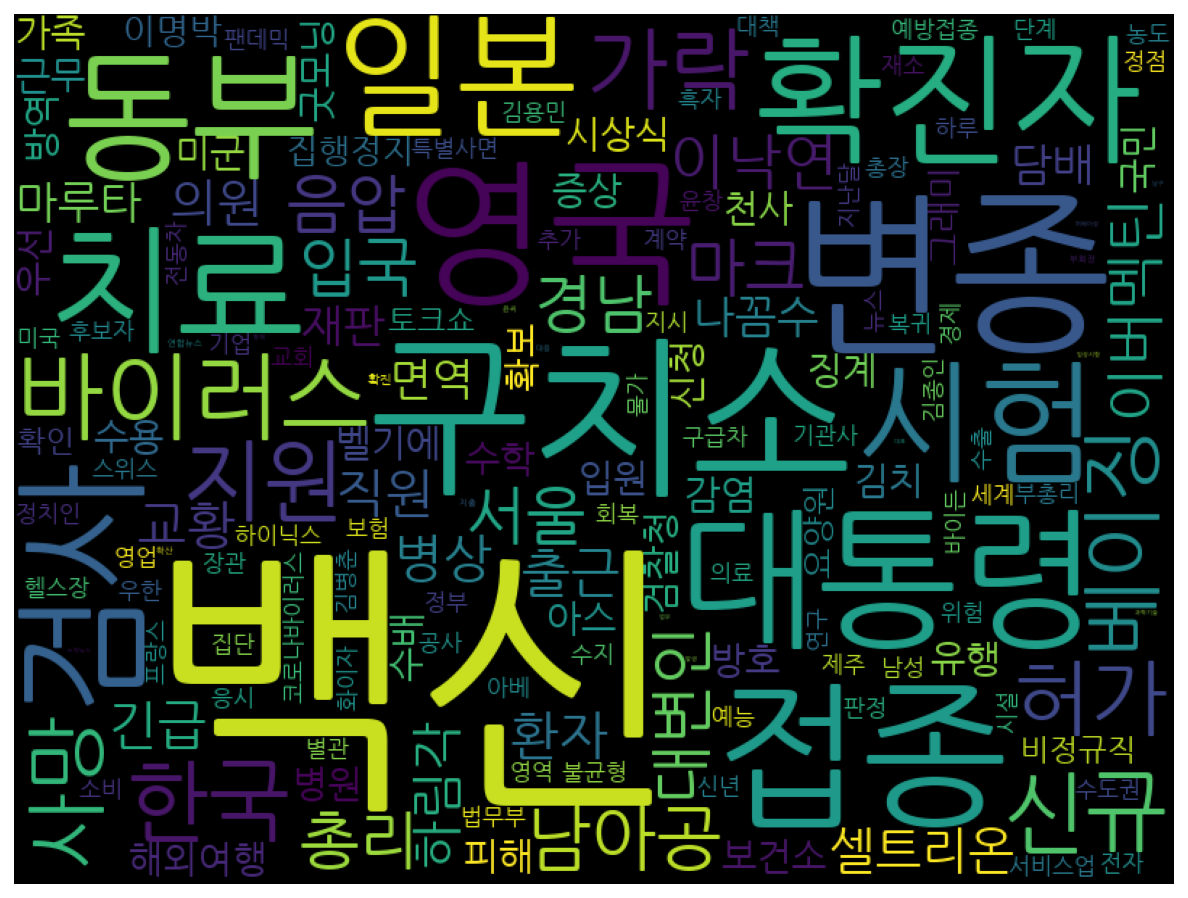

In [41]:
show_wordcloud(represent_3)

# save dataframes

In [22]:
import os
os.makedirs('./keyword', exist_ok=True)

In [42]:
keyword_df_1.to_csv("./keyword/1st_period_rep.csv", index=False, encoding="utf-8-sig")
keyword_df_2.to_csv("./keyword/2nd_period_rep.csv", index=False, encoding="utf-8-sig")
keyword_df_3.to_csv("./keyword/3rd_period_rep.csv", index=False, encoding="utf-8-sig")